In [34]:
%pylab inline
from scipy.fftpack import *
from scipy.io.wavfile import *

Populating the interactive namespace from numpy and matplotlib


Se busca tomar una señal y descomponerla en sus frecuencias fundamentales.

##Tratamiento de Archivos

In [35]:
#Algunas constantes que serán modificadas por las funciones.
t = []

In [36]:
#Nombre: Leer
#Parámetros: archivo- El nombre completo del archivo, junto con la extensión .wav.
#Parámetros: graficar- Booleano. De ser True, grafica los datos obtenidos del archivo importado.
#Este método importa un archivo escrito como .wav, para luego retornar un arreglo que contiene todos los datos
#contenidos en dicho archivo.
def leer(archivo, graficar):
    global t
    datosGeneral = read(archivo)
    original = datosGeneral[1]
    t = linspace(0, len(original), len(original))
    if(graficar == True):
        figure(figsize=(10,5))
        plot(t, original)
        xlabel("Tiempo(s)")
        ylabel("Valor")
        title("Visualización de Sonido")
    return original

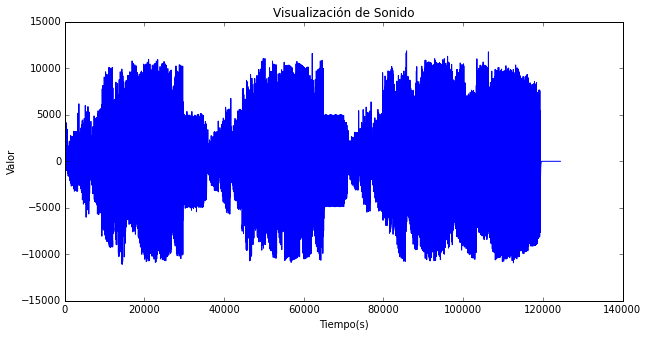

In [37]:
prueba = leer("resultado.wav", True)

In [38]:
#Nombre: Fourier
#Parámetros: archivo- El nombre del archivo generado por la función Leer.
#Parámetros: graficar- Booleano que, de ser True, permite a la función graficar la transformada de Fourier realizada
#Este método recibe un archivo que contiene los datos de un .wav y retorna un arreglo de dos elementos:
#el primero es la transformada discreta de Fourier y el segundo son las frecuencias asociadas.
def fourier(archivo, graficar):
    transformada = fft(archivo)
    N = len(archivo)
    dt = (archivo[-1] - archivo[0])/N
    frecuencias = fftfreq(N,dt)/(2*pi)
    final = array([frecuencias, transformada])
    if(graficar == True):
        plot(frecuencias, transformada.real)
        xlabel("Frecuencias(Hz)")
        ylabel("Dato en Transformada")
        title("Visualización en dominio de la Frecuencia")
    return final

2

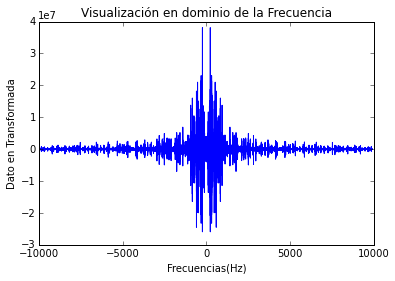

In [50]:
prueba2 = fourier(prueba, True)
len(prueba2)

In [59]:
#Nombre: Filtro
#Parámetros: transformada- Arreglo de datos correspondiente a la transformada de Fourier de un archivo
#de sonido.
#Parámetros: frecuencias- Arreglo de las frecuencias asociadas a esa misma transformada de Fourier.
#Esta función permite filtrar por la frecuencia máxima un arreglo en el dominio de la frecuencia, obtenido
#como la transformada de Fourier.
def filtro(transformada, frecuencias):
    global t
    transformada[frecuencias != max(frecuencias)] = 0 #El filtrado
    nuevos = ifft(transformada)
    return nuevos

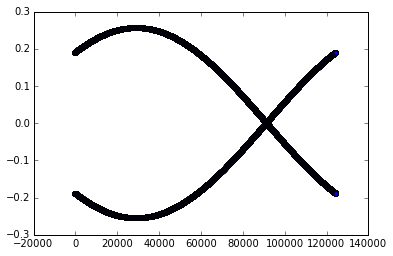

In [60]:
prueba3 = filtro(prueba2[1],prueba2[0])
scatter(t, prueba3.real)

In [40]:
#Pruebas con resultado.wav
datosGeneral = read("resultado.wav")
original = datosGeneral[1]

transformada = fft(original)
N = len(original)
dt = (original[-1] - original[0])/N
t = linspace(0, len(original), len(original))

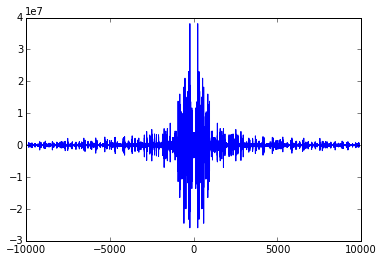

In [93]:
#Visualizar frecuencias
frecuencias = fftfreq(N,dt)/(2*pi)
plot(frecuencias, transformada.real)

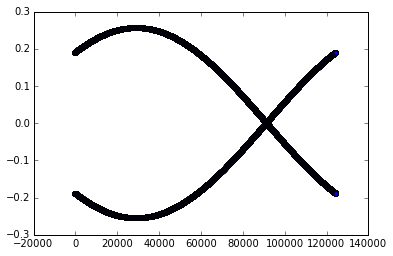

In [94]:
#Realizar filtrado de prueba
freq_max = 250 #Frecuencia límite superior
transformada[frecuencias < max(frecuencias)] = 0 #El filtrado
nuevos = ifft(transformada)
scatter(t, nuevos.real)

Tomar el archivo importado y realizar la transformada de Fourier. Esto para dejar los datos en el dominio de la frecuencia y poder realizar el filtro. Luego de tenerlos así, se construirán los arreglos que permiten su visualización gráfica y análisis.

In [4]:
#Propiedades a tener en cuenta:
N = len(archivo) #El número de datos obtenidos.
dt = (archivo[-1] - archivo[0])/N #El dt

NameError: name 'archivo' is not defined

In [ ]:
#Creación de los arreglos en el dominio de la frecuencia.
datosTransformados = fft(archivo)
frecuencias = fftfreq(N,dt)/(2*pi) #Frecuencia NO angular.

##Análisis de Fourier/Filtrado de Frecuencias

Para realizar el filtrado, visualizan primero las frecuencias contenidas en el archivo analizado.